In [1]:
# Astronomy imports
from astropy.utils.data import download_file as download_file
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
from astroquery.skyview import SkyView
# General imports
from pprint import pprint
import numpy as np

In [2]:
def calcminmax(img_data, threshold, bins=1000):
    """
    Uses histogram to calculate appropriate minimum/maximum values for colormap
    Args:
        img_data (ndarray): The image data
        threshold: Histogram y-value below which the pixels should be "blown out"
        bins (int): Number of bins (separations) for the histogram
    Returns:
        Tuple of int values to use for vmin, vmax
    """
    hist = plt.hist(img_data.flatten(), bins)
    # hist[0] is y-values (counts for each bin)
    # hist[1] is x-values (bin edges)
#     plt.figure()
#     plt.title('Plot of the Histogram')
#     plt.plot(list(hist[1][:-1]), list(hist[0]))
#     plt.show()
    for i,val in enumerate(hist[0]):
        if val > threshold:
            min_index = i
            break
    for i,val in enumerate(reversed(hist[0])):
        if val > threshold:
            max_index = len(hist[0]) - i
            break
    return (hist[1][min_index], hist[1][max_index])

In [8]:
# img_list = SkyView.get_images(position='Messier 51', survey=['SDSSu', 'SDSSr'],
#                              pixels='2400,2400',coordinates='J2000',grid=True,gridlabels=True)
img_list = SkyView.get_images(position='Messier 51', survey=['SDSSu', 'SDSSr'],
                             pixels='2400,2400')

vmin = -0.241943359375
vmax = 1.99297607422


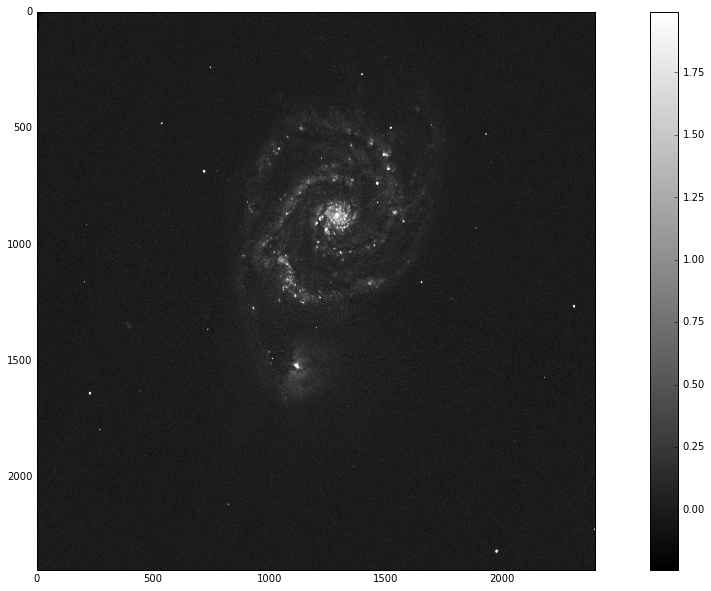

vmin = -0.11376953125
vmax = 5.26271240234


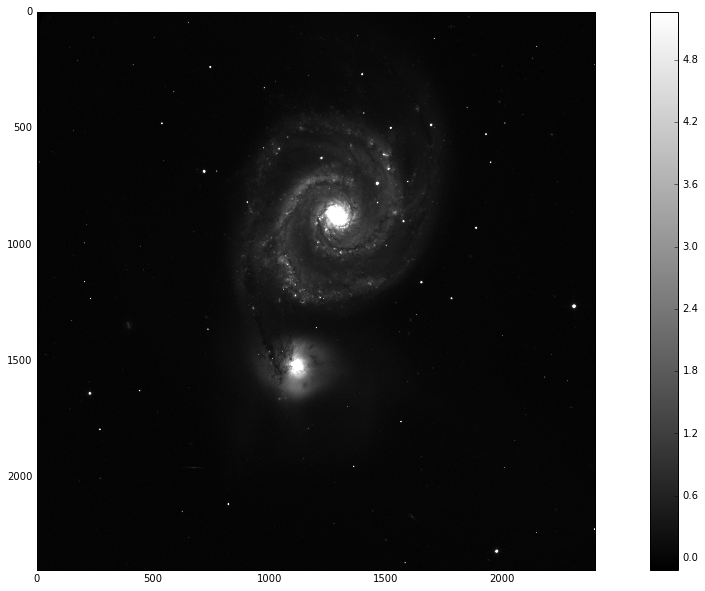

In [10]:
for img in img_list:
    plt.figure(figsize=(20,10))
    vmin,vmax = calcminmax(img[0].data, threshold=300)
    print 'vmin = {}'.format(vmin)
    print 'vmax = {}'.format(vmax)
    plt.imshow(img[0].data, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.show()

In [5]:
# # The functionality in this cell has been superceded by later code
# # (see above cells)
# # and it may start throwing HTTP 404 errors
# m51_red = download_file(
#     'https://skyview.gsfc.nasa.gov/tempspace/fits/skv16415838971419_1.fits')
# m51_uv = download_file(
#     'https://skyview.gsfc.nasa.gov/tempspace/fits/skv16415838971419_2.fits')
# img_list = [m51_uv, m51_red]

# for img in img_list:
#     img_data = fits.getdata(img)

#     plt.figure()
#     vmin,vmax = calcminmax(img_data, threshold=300)
#     print 'vmin = {}'.format(vmin)
#     print 'vmax = {}'.format(vmax)
#     plt.imshow(img_data, cmap='gray', vmin=vmin, vmax=vmax)
#     plt.colorbar()
#     plt.show()

In [1]:
import traceback


In [3]:
a = 3/0
traceback.print_exception()

ZeroDivisionError: integer division or modulo by zero